In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline


In [3]:
path = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Data Emersion /Task 6.1/02 Data/Prepared Data'

In [4]:
realtor_clean = pd.read_pickle(os.path.join(path, 'realtor-data_clean.pkl'))


In [5]:
realtor_clean.head()

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [6]:
df = realtor_clean

In [7]:
df = df.drop(columns=['status', 'street', 'city', 'zip_code', 'prev_sold_date', 'state'])

In [8]:
df.head()

,price,bed,bath,acre_lot,house_size
0,105000.0,3.0,2.0,0.12,920.0
1,80000.0,4.0,2.0,0.08,1527.0
2,67000.0,2.0,1.0,0.15,748.0
3,145000.0,4.0,2.0,0.10,1800.0
4,65000.0,6.0,2.0,0.05,NaN


#### The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [11]:
df.isnull().sum()

price              0
bed           479849
bath          509973
acre_lot      325071
house_size    566843
dtype: int64

In [12]:
# Fill missing values in the copied DataFrame
df['bed'].fillna(df['bed'].median(), inplace=True)
df['acre_lot'].fillna(df['acre_lot'].median(), inplace=True)
df['house_size'].fillna(df['house_size'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)

In [13]:
df.isnull().sum()


price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-1.1256876200112667e+19,
 -5.867627103028724e+18,
 -4.357656699247712e+18,
 -3.253907465484865e+18,
 -2.1714790025959158e+18,
 -1.4551915597826806e+18,
 -1.0206354008698737e+18,
 -7.70902114528512e+17,
 -5.833432300751247e+17]

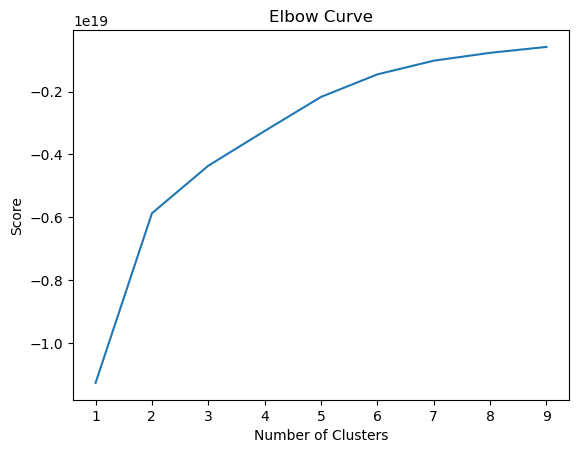

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


##### There's a large jump from one to two on the x-axis, but after that, the curve flattens out. However, only after 5 does each additional cluster yield diminishing returns. Thus, I will choose to go with 5 clusters.// After viewing the results I now believe three to make more sense

### 5. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [17]:
# Fit the k-means object to the data.

kmeans.fit(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
df['clusters'] = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df.head()

,price,bed,bath,acre_lot,house_size,clusters
0,105000.0,3.0,2.0,0.12,920.0,1
1,80000.0,4.0,2.0,0.08,1527.0,1
2,67000.0,2.0,1.0,0.15,748.0,1
3,145000.0,4.0,2.0,0.10,1800.0,1
4,65000.0,6.0,2.0,0.05,1760.0,1


In [20]:
df['clusters'].value_counts()

clusters
1    2218702
0       4724
2          3
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['acre_lot'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Size of lot') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Analyzing the clusters reaffirms our earlier findings: there is no linear correlation between AcreLot and Price. This observation suggests that while houses with smaller lots are not necessarily more expensive, the most expensive houses tend to have no acreage. This indicates that high-priced properties are typically located in densely populated areas, where outdoor space is limited or unavailable. This insight highlights the premium placed on location over lot size in determining the price of high-end real estate.



In [ ]:

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['house_size'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Size of house') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This reinforces the hypothesis from the previous analysis: the most expensive houses are also among the smallest in terms of lot size.






 

In [ ]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [ ]:
df.groupby('cluster').agg({'acre_lot':['mean', 'median'], 
                         'bath':['mean', 'median'], 
                         'house_size':['mean', 'median'],
                           'bed':['mean', 'median'],
                          'price':['mean', 'median']})

#### Represents houses with very large lots (mean: 364.29 acres) and large house sizes (mean: 7255.51 sq. ft.), having an average of about 6 bathrooms and 6 bedrooms. These houses are extremely expensive, with an average price of approximately $20.13 million.

#### Comprises houses with smaller lots (mean: 12.34 acres) and moderate house sizes (mean: 2463.09 sq. ft.), having around 2 bathrooms and 3 bedrooms on average. These houses are more affordable, with an average price of about $487,752.

#### houses with medium-sized lots (mean: 33.79 acres) and relatively smaller house sizes (mean: 1695 sq. ft.), having about 2 bathrooms and 4.67 bedrooms on average. Interestingly, the price for these houses is extraordinarily high, with an average price of around $1.34 billion, suggesting an outlier or a data anomaly.



In [ ]:
import os

In [24]:
# Take a random sample of 10% of the data
df_clean = df.sample(frac=0.3, random_state=1)

In [25]:
df_clean.to_csv(os.path.join(path,'realtor_cluster.csv'))